<a href="https://colab.research.google.com/github/Sruthidhar/-easy-coding/blob/main/RTA_modeling_With_Weights_Sahar_NIKOO_6_SEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
# df is the one with Reducded categories, obtained from "RTA_EDA.ipynb" on google drive:

url = 'https://drive.google.com/file/d/15XKjKr2bR9qsUJVintEhKUnmTpBkzd3Q/view?usp=sharing'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casualty,fitness_of_casualty,pedestrian_movement,cause_of_accident,accident_severity
0,1900-01-01 17:00:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Unknown,Unknown,Unknown,0,Other,Other,Not a Pedestrian,Moving Backward,Slight Injury
1,1900-01-01 17:00:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,0,Other,Other,Not a Pedestrian,Overtaking,Slight Injury
2,1900-01-01 17:00:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Other,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1900-01-01 01:00:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1900-01-01 01:00:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,0,Other,Other,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   time                         12316 non-null  object
 1   day_of_week                  12316 non-null  object
 2   age_band_of_driver           12316 non-null  object
 3   sex_of_driver                12316 non-null  object
 4   educational_level            12316 non-null  object
 5   vehicle_driver_relation      12316 non-null  object
 6   driving_experience           12316 non-null  object
 7   type_of_vehicle              12316 non-null  object
 8   owner_of_vehicle             12316 non-null  object
 9   service_year_of_vehicle      12316 non-null  object
 10  defect_of_vehicle            12316 non-null  int64 
 11  area_accident_occured        12316 non-null  object
 12  lanes_or_medians             12316 non-null  object
 13  road_allignment              12

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

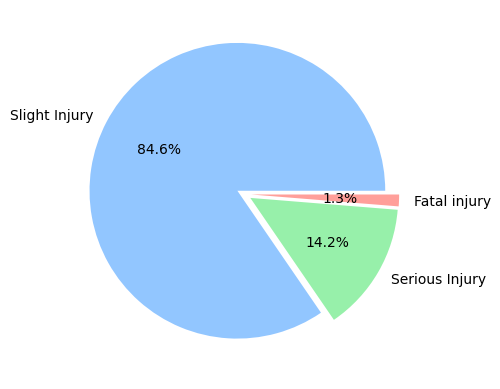

In [ ]:
# check_data_balance:

def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

check_data_balance(df['accident_severity'])

This shows that majority of the accident_severity reported were slight injuries (84.6%) while the least accident_severity reports were fatal injuries (1.3%)

In [ ]:
categorical_df = df.select_dtypes(include=['object'])
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'work_of_casualty', 'fitness_of_casualty', 'pedestrian_movement', 'cause_of_accident', 'accident_severity']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through each categorical column and apply label encoding
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

2    10415
1     1743
0      158
Name: accident_severity, dtype: int64

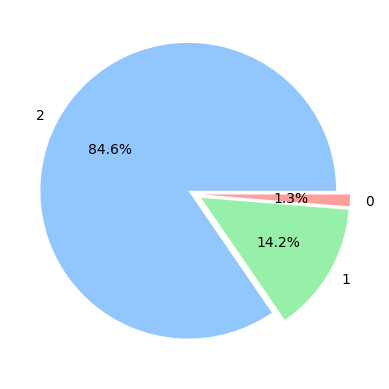

In [ ]:
# Check_data_balance

def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

check_data_balance(df['accident_severity'])

**Assigning Class Weights**

In [ ]:
# # Just another way of finding class weights
# from sklearn.utils.class_weight import compute_class_weight

# target_classes = df.accident_severity

# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(target_classes),
#                                         y = target_classes
#                                     )
# # Normalize class weights
# class_weights = [round(weight / sum(class_weights), 3) for weight in class_weights]

# print(class_weights)

In [ ]:
# Assigning class weights

class_counts = [len(df[df.accident_severity == 0]),
                len(df[df.accident_severity == 1]),
                len(df[df.accident_severity == 2])]

print(class_counts)


# Calculate class weights
total_samples = sum(class_counts)
class_weights = [total_samples / count for count in class_counts]

# Normalize class weights
class_weights = [round(weight / sum(class_weights), 3) for weight in class_weights]

print(class_weights)

[158, 1743, 10415]
[0.904, 0.082, 0.014]


In [ ]:
class_weights = {0: 0.904, 1: 0.082, 2: 0.014}
class_weights

{0: 0.904, 1: 0.082, 2: 0.014}

In [ ]:
# Split data into features (X) and target (y):

X = df.drop(["accident_severity"], axis=1)
y = df["accident_severity"]

In [ ]:
print(X.shape)
print(y.shape)
print()
print(y.unique())

(12316, 31)
(12316,)

[2 1 0]


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a StratifiedShuffleSplit object

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Use the split method to get indices for the stratified split
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (9852, 31)
X_test.shape: (2464, 31)
y_train.shape: (9852,)
y_test.shape: (2464,)


In [ ]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Define the numerical pipeline
pipeline_numerical = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1)))])

# Use the numerical pipeline in the ColumnTransformer
pipeline_full = ColumnTransformer([
    ("numerical", pipeline_numerical, X.columns)])  # Apply the numerical pipeline to all columns

In [ ]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (9852, 31)
X_test_transformed.shape: (2464, 31)


In [ ]:
class_weights

{0: 0.904, 1: 0.082, 2: 0.014}

# MODELING - Target: accident_severity

**Logistic Regression classification**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(fit_intercept=True, random_state=123, class_weight=class_weights)
logistic_reg.fit(X_train_transformed, y_train)

LogisticRegression(class_weight={0: 0.904, 1: 0.082, 2: 0.014},
                   random_state=123)

In [ ]:
# Make predictions:

y_pred = logistic_reg.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = logistic_reg.predict(X_test_transformed)
y_pred_proba = logistic_reg.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 3)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),3)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),3)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),3)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),3)  #One-vs-Rest (OvR)

In [ ]:
results_logistic_reg = pd.DataFrame([['Logistic Reg', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_logistic_reg

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Logistic Reg,0.482,0.763,0.482,0.576,0.61


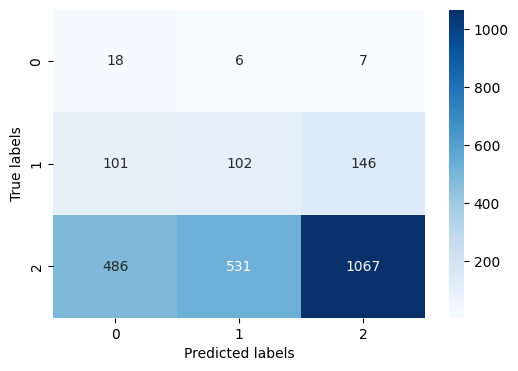

In [ ]:
# ploting confusion_matrix:

y_pred = logistic_reg.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

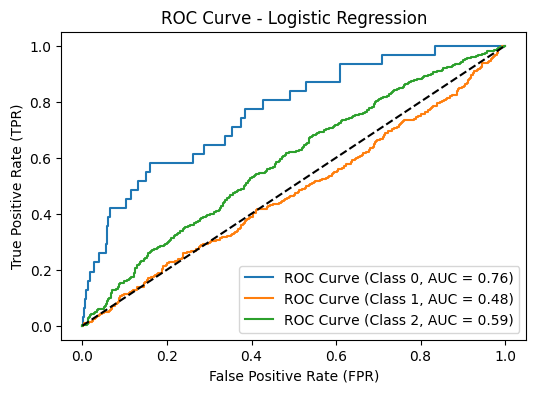

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], logistic_reg.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(logistic_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [1.07127998 1.08609588 1.06751764 1.1129145  1.08893838]
Mean: 1.0853492756820708
Standard deviation: 0.016057353564114828


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(logistic_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  46.671 % Variance:  0.017 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:

mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Logistic_Reg = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 2)],
    'Std Accuracy': [round(std_accuracy, 2)]})

# Add a new column to the DataFrame
MODEL = ["Logistic_Reg"] * len(CV_Logistic_Reg)
CV_Logistic_Reg = pd.concat([pd.Series(MODEL, name='Model'), CV_Logistic_Reg], axis=1)

CV_Logistic_Reg

,Model,Mean Accuracy,Std Accuracy
0,Logistic_Reg,46.67,0.13


**Decision Trees Classifier**

In [ ]:
# Building a classifier using decision tree classifier:

tree_clf = DecisionTreeClassifier(max_depth=10, criterion='entropy', class_weight=class_weights)    #criterion='gini'
tree_clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.082, 2: 0.014},
                       criterion='entropy', max_depth=10)

In [ ]:
# Make predictions:

y_pred = tree_clf.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = tree_clf.predict(X_test_transformed)
y_pred_proba = tree_clf.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_DecisionTree = pd.DataFrame([['Decision Tree', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_DecisionTree

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Decision Tree,0.58,0.78,0.58,0.66,0.66


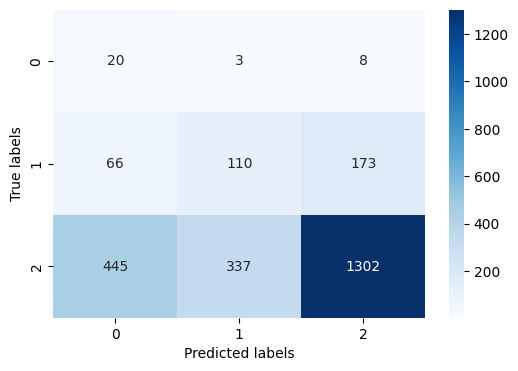

In [ ]:
# ploting confusion_matrix:

y_pred = tree_clf.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

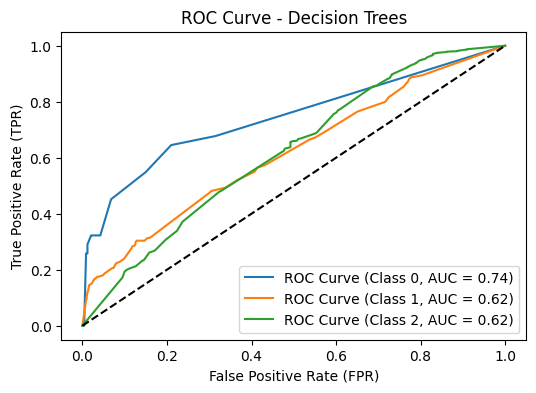

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], tree_clf.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Decision Trees")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(tree_clf, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.92652441 0.77897277 0.98491155 0.94654059 0.80354544]
Mean: 0.8880989534632671
Standard deviation: 0.08163631443983281


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(tree_clf, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  57.887 % Variance:  0.124 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:

mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Desicion_Tree = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 2)],
    'Std Accuracy': [round(std_accuracy, 2)]})

# Add a new column to the DataFrame
MODEL = ["Decision Tree"] * len(CV_Desicion_Tree)
CV_Desicion_Tree = pd.concat([pd.Series(MODEL, name='Model'), CV_Desicion_Tree], axis=1)

CV_Desicion_Tree

,Model,Mean Accuracy,Std Accuracy
0,Decision Tree,57.89,0.35


**Random Forest Classifier**

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, max_depth=10, class_weight='balanced')
rnd_clf.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=16,
                       n_estimators=200, n_jobs=-1)

The 'balanced' option automatically computes class weights based on the number of samples in each class

In [ ]:
# Make predictions:

y_pred = rnd_clf.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = rnd_clf.predict(X_test_transformed)
y_pred_proba = rnd_clf.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_RandomForest = pd.DataFrame([['Random Forest', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_RandomForest

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Random Forest,0.73,0.77,0.73,0.75,0.68


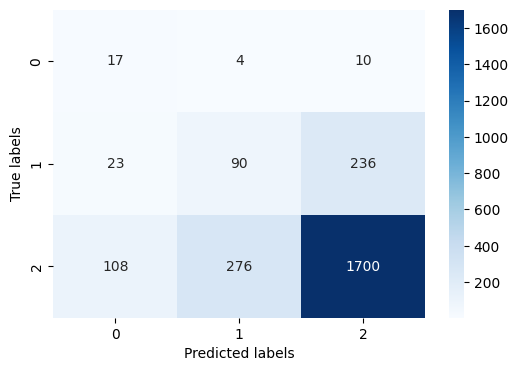

In [ ]:
# ploting confusion_matrix:

y_pred = rnd_clf.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

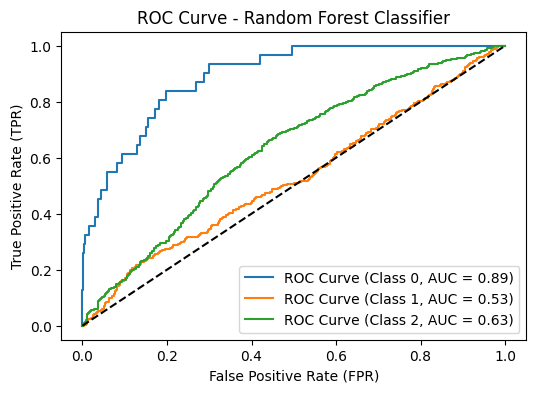

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rnd_clf.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(rnd_clf, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.70405076 0.66016618 0.65994924 0.66378395 0.66110199]
Mean: 0.6698104222427885
Standard deviation: 0.017174458552761104


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(rnd_clf, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  71.884 % Variance:  0.009 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_RandomForest = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Random Forest"] * len(CV_RandomForest)
CV_RandomForest = pd.concat([pd.Series(MODEL, name='Model'), CV_RandomForest], axis=1)

CV_RandomForest

,Model,Mean Accuracy,Std Accuracy
0,Random Forest,71.884,0.097


**Extra Tree Classifier**

In [ ]:
extra_tree_clf = ExtraTreesClassifier(n_estimators=5, class_weight=class_weights)
extra_tree_clf.fit(X_train_transformed, y_train)

ExtraTreesClassifier(class_weight={0: 0.904, 1: 0.082, 2: 0.014},
                     n_estimators=5)

In [ ]:
# Make predictions:

y_pred = extra_tree_clf.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = extra_tree_clf.predict(X_test_transformed)
y_pred_proba =extra_tree_clf.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_Extra_Tree = pd.DataFrame([['Extra_Tree', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_Extra_Tree

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Extra_Tree,0.83,0.77,0.83,0.78,0.61


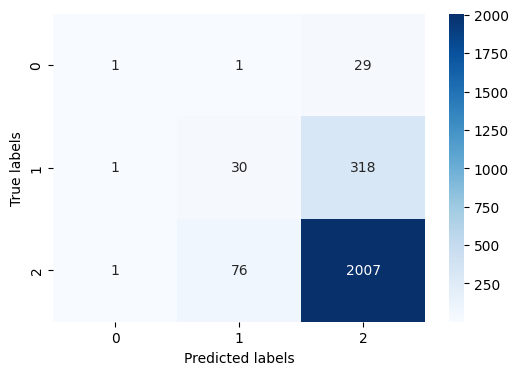

In [ ]:
# ploting confusion_matrix:

y_pred = extra_tree_clf.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

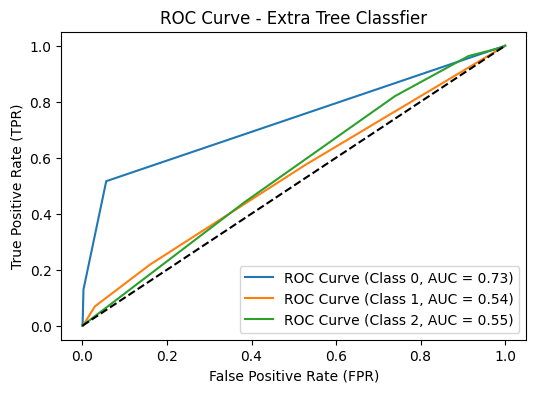

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], extra_tree_clf.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Extra Tree Classfier")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(extra_tree_clf, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.4538577  0.46924705 0.47206211 0.46556554 0.46392718]
Mean: 0.4649319154146198
Standard deviation: 0.006221084015519213


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(extra_tree_clf, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  82.471 % Variance:  0.003 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Extra_Tree  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Extra_Tree"] * len(CV_Extra_Tree)
CV_Extra_Tree  = pd.concat([pd.Series(MODEL, name='Model'), CV_Extra_Tree], axis=1)

CV_Extra_Tree

,Model,Mean Accuracy,Std Accuracy
0,Extra_Tree,82.471,0.053


**Balanced Random Forest**

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
Balanced_rf_clf = BalancedRandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, max_depth=10)
Balanced_rf_clf.fit(X_train_transformed, y_train)

BalancedRandomForestClassifier(max_depth=10, max_leaf_nodes=16,
                               n_estimators=200, n_jobs=-1)

In [ ]:
# Make predictions:

y_pred = Balanced_rf_clf.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = Balanced_rf_clf.predict(X_test_transformed)
y_pred_proba = Balanced_rf_clf.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_BalancedRandomForest= pd.DataFrame([['Balanced Random Forest', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_BalancedRandomForest

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Balanced Random Forest,0.55,0.78,0.55,0.63,0.67


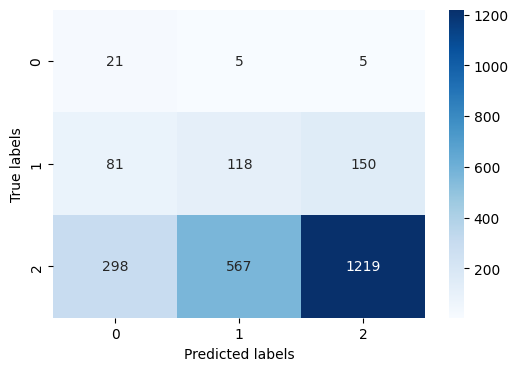

In [ ]:
# ploting confusion_matrix:

y_pred = Balanced_rf_clf.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

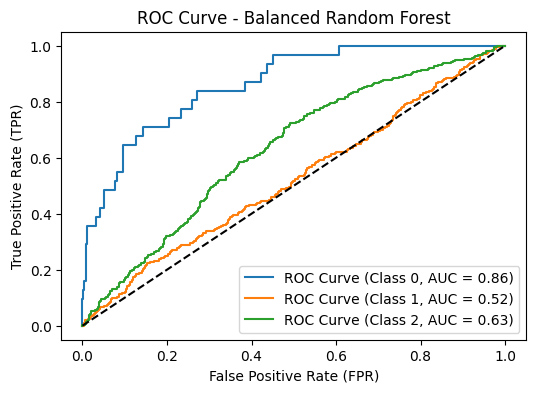

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], Balanced_rf_clf.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Balanced Random Forest")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(Balanced_rf_clf, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [1.04296342 1.0090911  0.991333   0.98000311 0.98876942]
Mean: 1.002432010487349
Standard deviation: 0.02236089840003127


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(Balanced_rf_clf, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  52.213 % Variance:  0.038 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_BalancedRandomForest  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Balanced Random Forest"] * len(CV_BalancedRandomForest )
CV_BalancedRandomForest = pd.concat([pd.Series(MODEL, name='Model'), CV_BalancedRandomForest], axis=1)

CV_BalancedRandomForest

,Model,Mean Accuracy,Std Accuracy
0,Balanced Random Forest,52.213,0.195


**Gradient Boosting**

In [ ]:
gbes = ensemble.GradientBoostingClassifier(n_estimators=100)

# Compute sample weights based on class weights
sample_weights = [class_weights[y] for y in y_train]

# Fit the classifier with sample weights
gbes.fit(X_train_transformed, y_train, sample_weight=sample_weights)

GradientBoostingClassifier()

In [ ]:
# Make predictions:

y_pred = gbes.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = gbes.predict(X_test_transformed)
y_pred_proba = gbes.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_GradientBoosting= pd.DataFrame([['Gradient Boosting', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_GradientBoosting

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Gradient Boosting,0.63,0.78,0.63,0.69,0.71


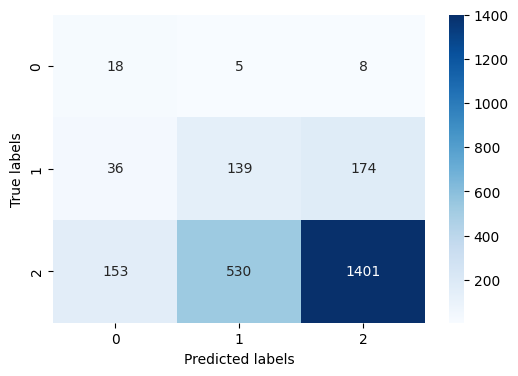

In [ ]:
# ploting confusion_matrix:

y_pred = gbes.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

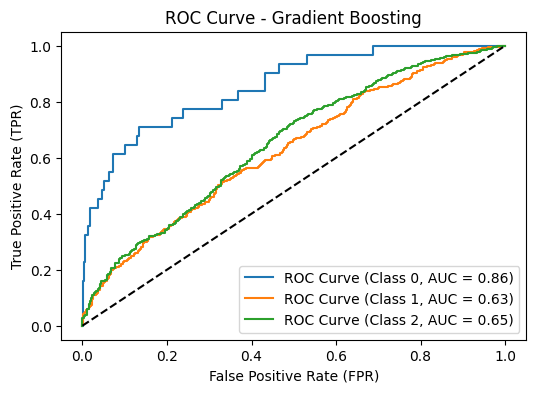

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], gbes.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(gbes, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.43560463 0.44596392 0.44035058 0.4362973  0.43977382]
Mean: 0.4395980485279251
Standard deviation: 0.0036868367066629757


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(gbes, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  84.744 % Variance:  0.0 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Gradient_Boosting  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Gradient_Boosting"] * len(CV_Gradient_Boosting )
CV_Gradient_Boosting  = pd.concat([pd.Series(MODEL, name='Model'), CV_Gradient_Boosting], axis=1)

CV_Gradient_Boosting

,Model,Mean Accuracy,Std Accuracy
0,Gradient_Boosting,84.744,0.009


**Extreme Gradient Boosting**

In [ ]:
XGBC=XGBClassifier()

sample_weights = [class_weights[y] for y in y_train]

XGBC.fit(X_train_transformed, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions:

y_pred = XGBC.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = XGBC .predict(X_test_transformed)
y_pred_proba = XGBC .predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_XGB= pd.DataFrame([['XGB', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_XGB

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,XGB,0.72,0.8,0.72,0.75,0.74


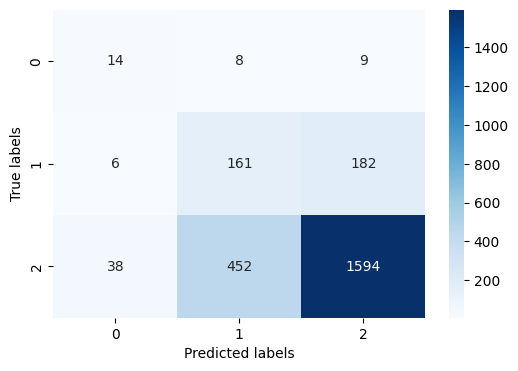

In [ ]:
# ploting confusion_matrix:

y_pred = XGBC.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

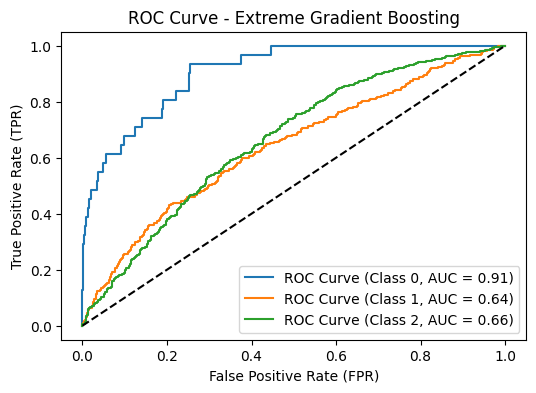

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], XGBC.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Extreme Gradient Boosting")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(XGBC, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.43092057 0.4367678  0.42866811 0.43396414 0.44092657]
Mean: 0.43424943801712806
Standard deviation: 0.004318339246276828


In [ ]:
# Cross-validation On Training set:

cv_scores = cross_val_score(XGBC, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  84.704 % Variance:  0.0 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_XGB  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["XGB"] * len(CV_XGB)
CV_XGB = pd.concat([pd.Series(MODEL, name='Model'), CV_XGB ], axis=1)

CV_XGB

,Model,Mean Accuracy,Std Accuracy
0,XGB,84.704,0.021


**Support Vector Classification (SVC Classifier)**

In [ ]:
svm_clf = SVC(kernel="linear", C=1.0, probability=True, class_weight=class_weights)
svm_clf.fit(X_train_transformed, y_train)

SVC(class_weight={0: 0.904, 1: 0.082, 2: 0.014}, kernel='linear',
    probability=True)

In [ ]:
# Make predictions:

y_pred = svm_clf.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = svm_clf .predict(X_test_transformed)
y_pred_proba = svm_clf .predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_SVC= pd.DataFrame([['SVC', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_SVC

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,SVC,0.48,0.76,0.48,0.58,0.63


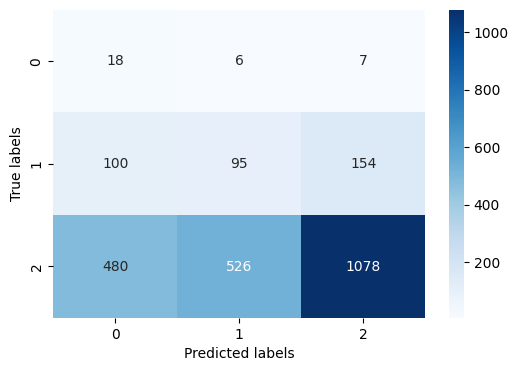

In [ ]:
# ploting confusion_matrix:

y_pred = svm_clf.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

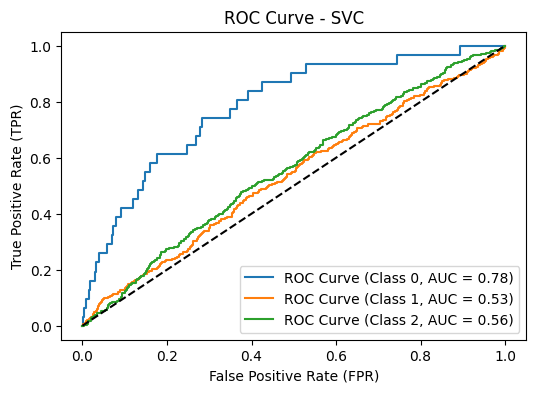

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_clf.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - SVC")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(svm_clf, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [1.06462895 1.11217605 1.0385953  1.12719048 1.07202546]
Mean: 1.0829232478547168
Standard deviation: 0.0323534357054553


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(svm_clf, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  47.239 % Variance:  0.103 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_SVC  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["SVC"] * len(CV_SVC  )
CV_SVC = pd.concat([pd.Series(MODEL, name='Model'), CV_SVC ], axis=1)

CV_SVC

,Model,Mean Accuracy,Std Accuracy
0,SVC,47.239,0.321


**KNN Classfier**: by oversampling using the imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=123)   # oversample the minority class and balance the class distribution

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)


In [ ]:
# Create and train the KNeighborsClassifier:

knnc = KNeighborsClassifier(n_neighbors=20)
knnc.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Make predictions on the test set:

y_pred = knnc.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = knnc.predict(X_test_transformed)
y_pred_proba = knnc.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_KNN= pd.DataFrame([['KNN', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_KNN

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,KNN,0.45,0.74,0.45,0.53,0.54


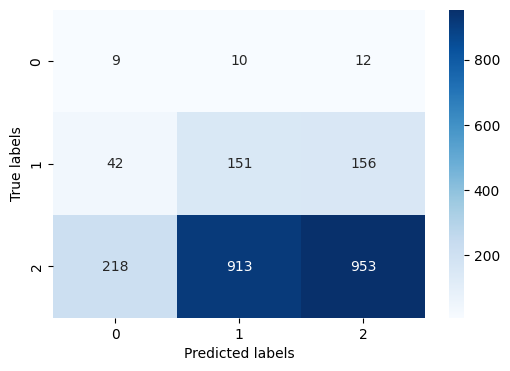

In [ ]:
# ploting confusion_matrix:

y_pred = knnc.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

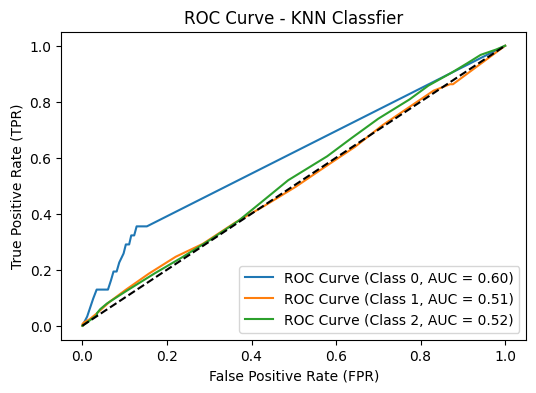

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], knnc.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - KNN Classfier")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(knnc, X_train_resampled, y_train_resampled, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.62680027 0.63409811 0.64131292 0.62654371 0.63447697]
Mean: 0.6326463954609846
Standard deviation: 0.005513384072512463


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(knnc, X_train_resampled, y_train_resampled, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  71.736 % Variance:  0.005 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_KNN  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["KNN"] * len(CV_KNN )
CV_KNN  = pd.concat([pd.Series(MODEL, name='Model'), CV_KNN  ], axis=1)

CV_KNN

,Model,Mean Accuracy,Std Accuracy
0,KNN,71.736,0.068


**GaussianNB**: by oversampling using the imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=123)   # oversample the minority class and balance the class distribution

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
# Make predictions:

y_pred = gnb.predict(X_test_transformed)

In [ ]:
# Evaluating the model on the transformed testing set:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = gnb.predict(X_test_transformed)
y_pred_proba = gnb.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
accuracy_score = round(accuracy_score(y_test, y_pred), 2)
precision_score = round(precision_score(y_test, y_pred, average='weighted'),2)
recall_score = round(recall_score(y_test, y_pred, average='weighted'),2)
f1_score= round(f1_score(y_test, y_pred, average='weighted'),2)
roc_auc_score = round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),2)  #One-vs-Rest (OvR)

In [ ]:
results_GaussianNB = pd.DataFrame([['GaussianNB', accuracy_score,precision_score,recall_score, f1_score,roc_auc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC'])
results_GaussianNB

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,GaussianNB,0.09,0.75,0.09,0.14,0.55


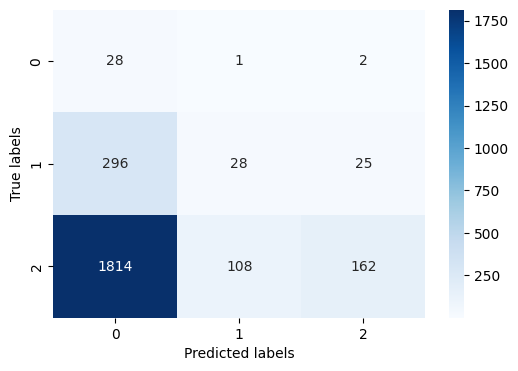

In [ ]:
# ploting confusion_matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = gnb.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

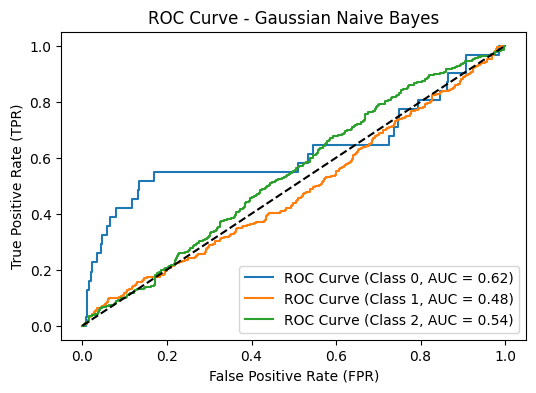

In [ ]:
# One-vs-Rest (OvR) ROC Curves:

classes = [0, 1, 2]

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], gnb.predict_proba(X_test_transformed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'k--')
plt.show()


In [ ]:
# Cross-validation On Traing set:

scores = cross_val_score(gnb, X_train_resampled, y_train_resampled, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [1.22886208 1.23503241 1.23316833 1.24338989 1.2421019 ]
Mean: 1.2365109230158544
Standard deviation: 0.005485303465300347


In [ ]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(gnb, X_train_resampled, y_train_resampled, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  36.946 % Variance:  0.001 %


In [ ]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_GaussianNB  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["GaussianNB"] * len(CV_GaussianNB )
CV_GaussianNB  = pd.concat([pd.Series(MODEL, name='Model'), CV_GaussianNB  ], axis=1)

CV_GaussianNB

,Model,Mean Accuracy,Std Accuracy
0,GaussianNB,36.946,0.027


# Quick Results

In [ ]:
Result=pd.concat([results_logistic_reg, results_DecisionTree, results_RandomForest, results_Extra_Tree,  results_BalancedRandomForest, results_GradientBoosting, results_XGB, results_SVC, results_KNN,results_GaussianNB ])
Result.set_index('Model')
Result

,Model,Accuracy,Precision,Recall,F1_Score,ROC
0,Logistic Reg,0.482,0.763,0.482,0.576,0.61
0,Decision Tree,0.580,0.780,0.580,0.660,0.66
0,Random Forest,0.730,0.770,0.730,0.750,0.68
0,Extra_Tree,0.830,0.770,0.830,0.780,0.61
0,Balanced Random Forest,0.550,0.780,0.550,0.630,0.67
0,Gradient Boosting,0.630,0.780,0.630,0.690,0.71
0,XGB,0.720,0.800,0.720,0.750,0.74
0,SVC,0.480,0.760,0.480,0.580,0.63
0,KNN,0.450,0.740,0.450,0.530,0.54
0,GaussianNB,0.090,0.750,0.090,0.140,0.55


**Extra Trees**: Extra Trees continues to perform exceptionally well across all metrics, with high accuracy, precision, recall, and F1-score. Its ROC score is also respectable.

**Random Forest**: Random Forest also performs well with a high accuracy and precision. It provides a good balance between precision and recall.

**XGBoost**: XGBoost shows strong performance, particularly in precision, and ROC. It's a solid choice for classification tasks.

**Gradient Boosting**: Gradient Boosting performs well in precision and ROC. However, its overall accuracy is lower than the top models.

**Decision Tree**: Decision Tree provides a reasonable F1-score but has lower accuracy compared to Random Forest and Extra Trees.

**Balanced Random Forest**: Despite its name, Balanced Random Forest does not perform as well as other models, particularly in terms of accuracy.

**Logistic Regression**: Logistic Regression has moderate precision but relatively low accuracy and F1-score.

**Support Vector Classifier (SVC)** : SVC performs similarly to Logistic Regression in terms of metrics.

**K-Nearest Neighbors (KNN)**: KNN has the lowest accuracy among all models, indicating it may not be well-suited for this problem.

**Gaussian Naive Bayes**: Gaussian Naive Bayes has very low accuracy and F1-score, suggesting that it's not performing well on this dataset.

In summary, **Extra Trees**, **Random Forest**, and **XGBoost** are the top-performing models across various metrics. These models offer a good balance of accuracy, precision, recall, and F1-score.

In [ ]:
# Result from Cross-validation on Training Set:

CV_Result=pd.concat([CV_Logistic_Reg, CV_Desicion_Tree, CV_RandomForest, CV_Extra_Tree, CV_BalancedRandomForest, CV_Gradient_Boosting, CV_XGB, CV_SVC, CV_KNN, CV_GaussianNB])
CV_Result.set_index('Model')
CV_Result

,Model,Mean Accuracy,Std Accuracy
0,Logistic_Reg,46.670,0.130
0,Decision Tree,57.890,0.350
0,Random Forest,71.884,0.097
0,Extra_Tree,82.471,0.053
0,Balanced Random Forest,52.213,0.195
0,Gradient_Boosting,84.744,0.009
0,XGB,84.704,0.021
0,SVC,47.239,0.321
0,KNN,71.736,0.068
0,GaussianNB,36.946,0.027


**Gradient Boosting** and **XGBoost**: These two models show consistent high performance in both the test set and cross-validation, indicating that they are likely not overfitting. They maintain high accuracy and low standard deviations.

**Extra Trees**: Extra Trees also maintains consistent performance between the test set and cross-validation, suggesting that it's not overfitting. It has a high mean accuracy and a low standard deviation.

**Random Forest**: Random Forest performs similarly in both the test set and cross-validation, indicating it's not overfitting. It maintains a good balance between accuracy and stability.

**Decision Tree**: Decision Tree shows a slight drop in performance from cross-validation to the test set, suggesting some overfitting. The standard deviation in cross-validation is relatively high, indicating variability.

**Balanced Random Forest**: This model shows a significant drop in performance from cross-validation to the test set, indicating potential overfitting. The standard deviation in cross-validation is also relatively high, suggesting instability.

**Logistic Regression** and **Support Vector Classifier (SVC)**: Both Logistic Regression and SVC exhibit consistent but relatively low performance in both cross-validation and the test set, suggesting underfitting. The standard deviations are also relatively low.

**K-Nearest Neighbors (KNN)**: KNN performs similarly in both cross-validation and the test set, but the performance is relatively low, indicating potential underfitting.

**Gaussian Naive Bayes**: Gaussian Naive Bayes has a significant drop in performance from cross-validation to the test set, suggesting overfitting. The standard deviation in cross-validation is relatively low, indicating stability.

In summary, **Gradient Boosting**, **XGBoost**, and **Extra Trees** appear to be the most stable and well-generalized models, as they show consistent high performance in both cross-validation and the test set. **Random Forest** also performs well but may have slight overfitting. **Decision Tree**, **Balanced Random Forest**, **Logistic Regression**, **SVC, KNN, and Gaussian Naive Bayes** show signs of either underfitting or overfitting to varying degrees.

# Results Visaliztion

In [ ]:
# Model Performance Bar plot

# Melt the dataframe to create a long-format data for plotting
melted_result = Result.melt(id_vars=['Model'], value_vars=['Accuracy','Precision','Recall', 'F1_Score','ROC'],
                            var_name='Metric', value_name='Score')

# Create a bar chart
fig = px.bar(melted_result, x='Model', y='Score', color='Metric', title='Model Performance',
             labels={'Score': 'Score Value'}, barmode='group', color_discrete_sequence=px.colors.sequential.Viridis, opacity=0.8)

# Rotate the x-axis labels for better readability (modify as needed)
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


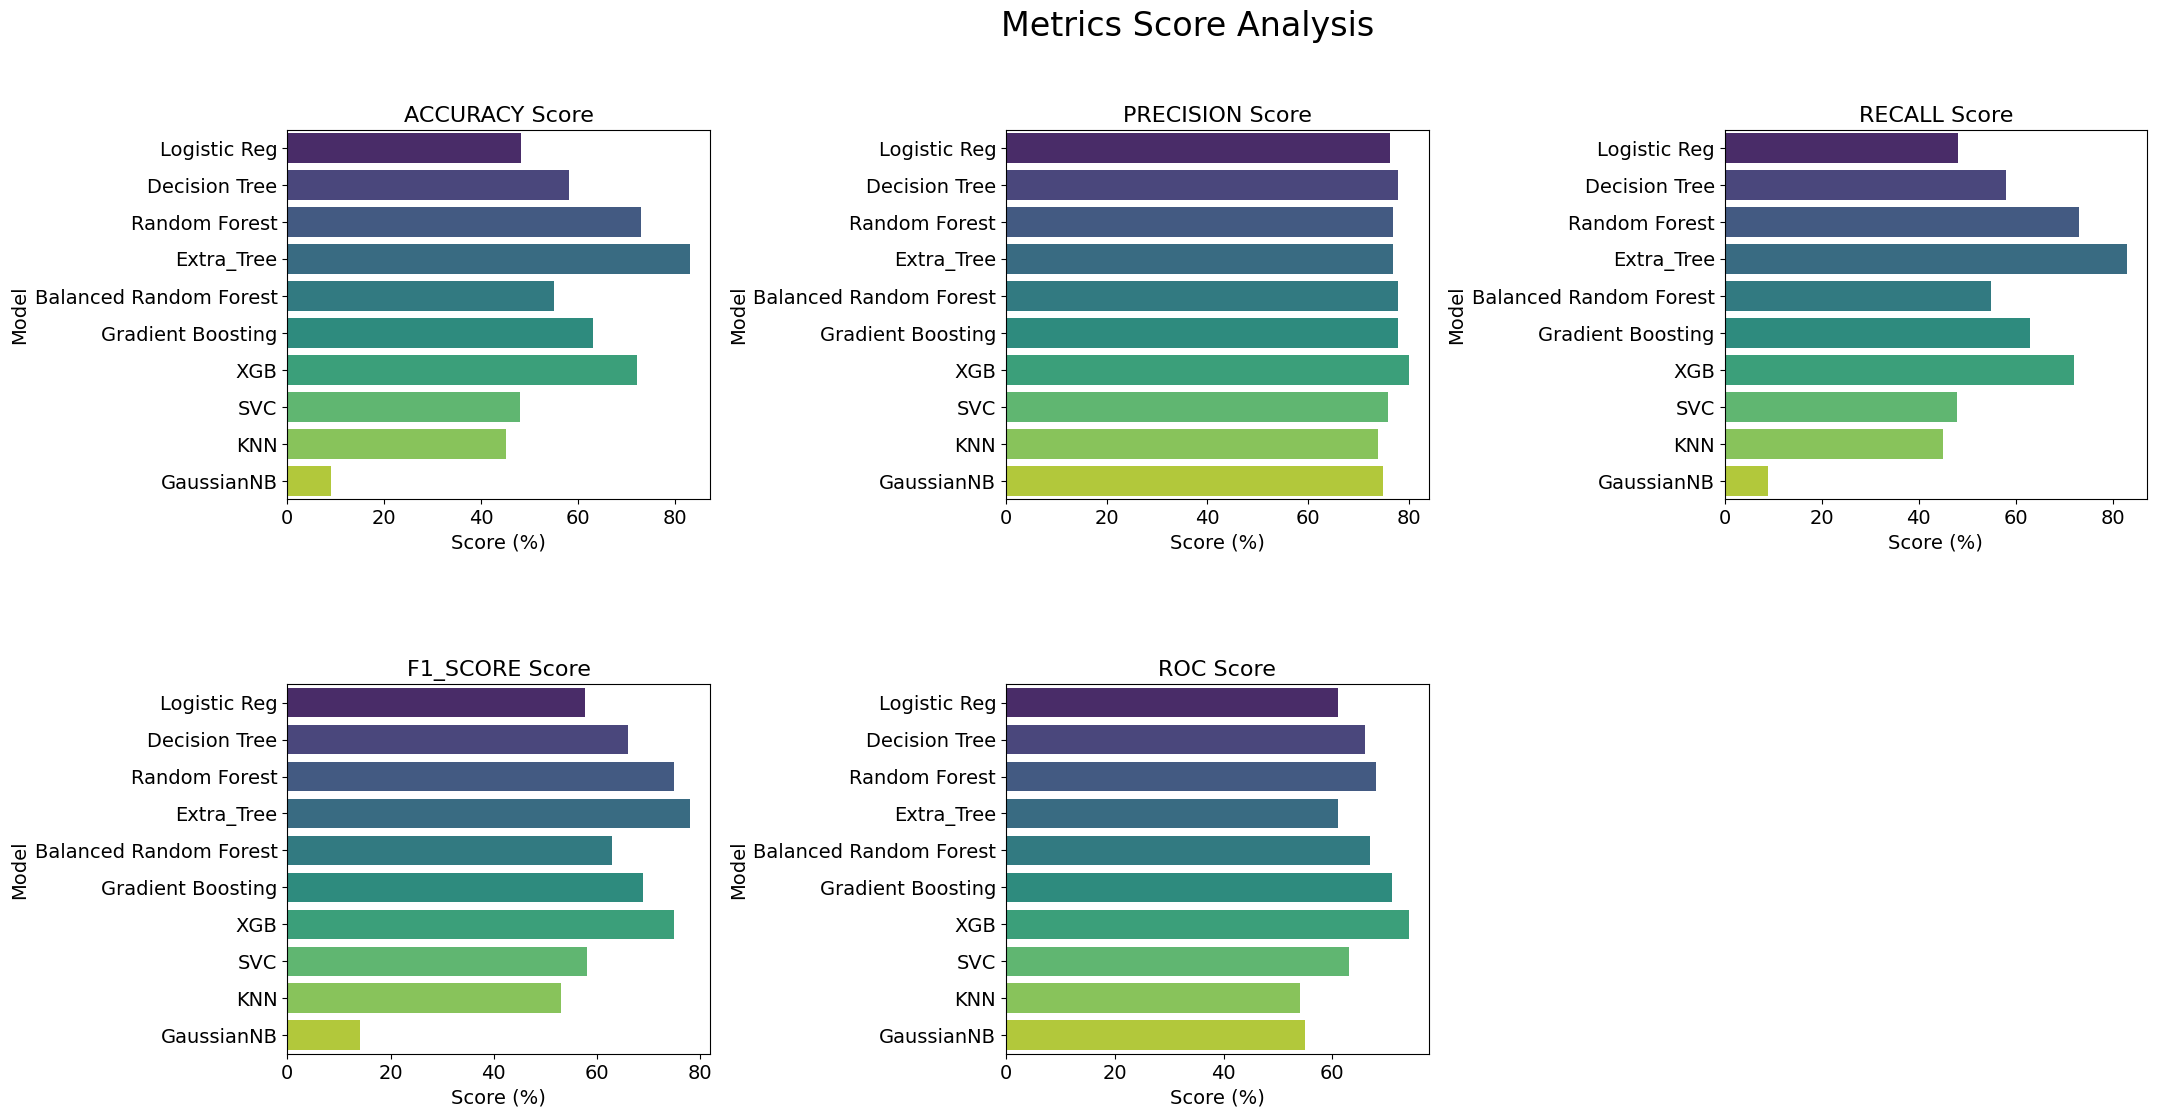

In [ ]:
# Plotting evaluation metrics in bar chart:

plt.figure(figsize=(24, 12))
plt.suptitle("Metrics Score Analysis", fontsize=24)
plt.subplots_adjust(wspace=0.7, hspace=0.5)

tuple_list = [(1, 'Accuracy'), (2, 'Precision'), (3, 'Recall'), (4, 'F1_Score'), (5, 'ROC')]

for i, j in tuple_list:
    ax = plt.subplot(2, 3, i)

    # Set the title and adjust font size
    ax.set_title(j.upper() + " Score", fontsize=16)

    # Create the barplot
    sns.barplot(x=Result[j] * 100,
                y='Model',
                data=Result,
                palette="viridis",
                orient='h', ax=ax)

    # Set the x-label and y-label and adjust font size
    ax.set_xlabel('Score (%)', fontsize=14)
    ax.set_ylabel('Model', fontsize=14)

    # Set font size for the tick labels
    ax.tick_params(axis='both', labelsize=14)

plt.savefig('Metrics Score.png')
plt.show()


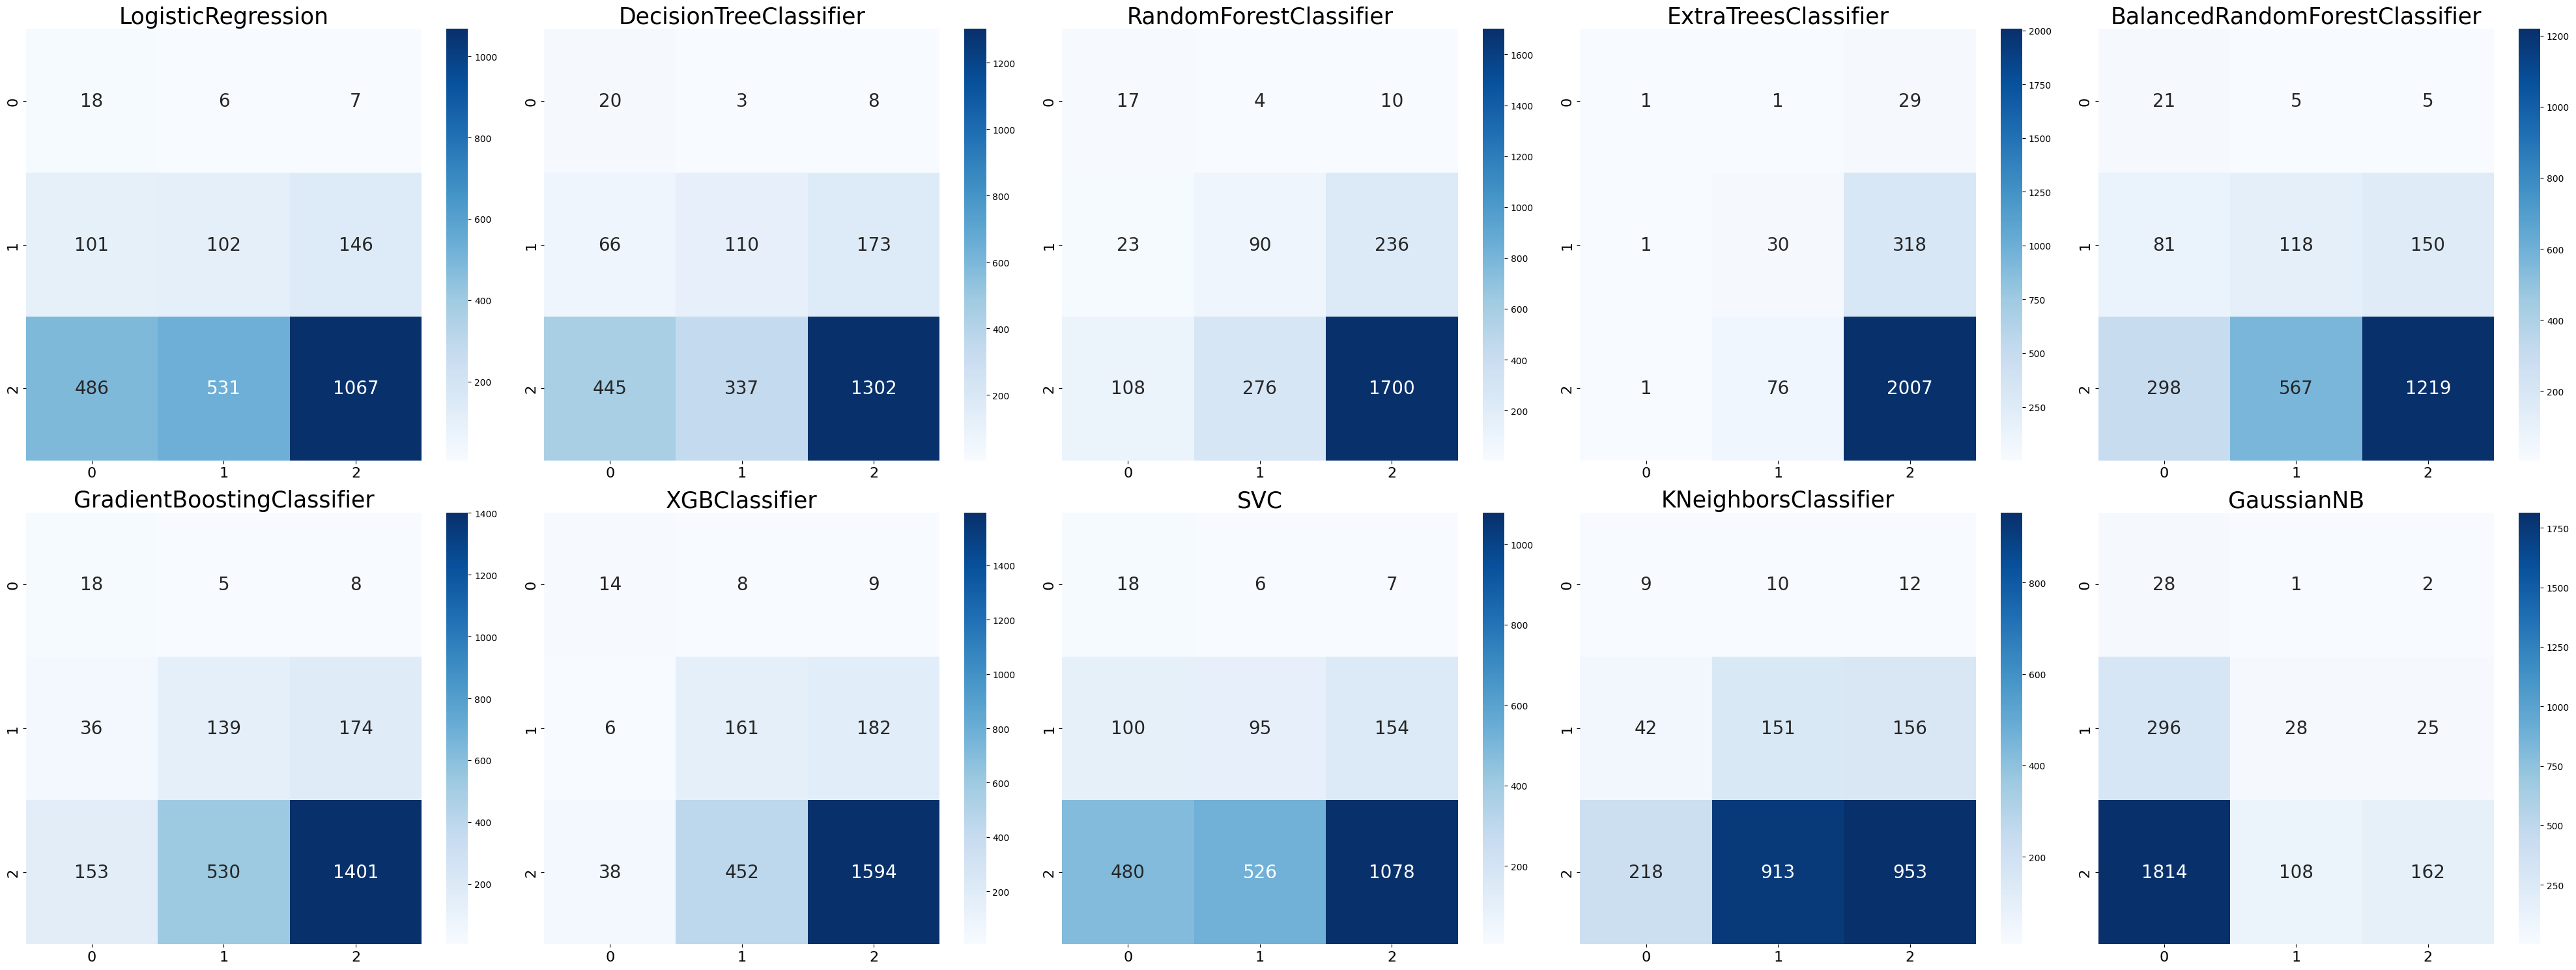

In [ ]:
# Ploting the confusion matrix:

classifiers = [logistic_reg, tree_clf, rnd_clf ,extra_tree_clf, Balanced_rf_clf, gbes, XGBC,  svm_clf , knnc, gnb]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(40, 15))
for cls, ax in zip(classifiers, axes.flatten()):
    # Calculate predicted labels using the classifier
    y_pred = cls.predict(X_test_transformed)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"fontsize": 20})

    ax.set_title(type(cls).__name__, fontsize=25)

    # Increase the font size of y-tick and x-tick labels
    ax.tick_params(axis='both', which='major', labelsize=16)  # Adjust the labelsize as needed

plt.tight_layout()
plt.savefig('Confusion Matrix.png')
plt.show()

# Feature Importance Investigation

In [ ]:
# Feature Importance Investigation

rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, max_depth=10, class_weight='balanced')
rnd_clf.fit(X_train, y_train.ravel())

#print(rnd_clf.feature_importances_)

#plot graph of feature importances for better visualization

feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns ).sort(ascending=False)
feat_importances.nlargest(30).plot(kind='barh', figsize=(10,6), fontsize=8)
#plt.axvline(x=0.05,label='relative importance = 0.05')
plt.show()

AttributeError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

feat_importances = pd.DataFrame(XGBC.feature_importances_, index=X.columns, columns=['importance'] ).sort_values(by='importance', ascending=True)
# feat_importances.nlargest(30, columns=['importance']).plot(kind='barh', figsize=(10,6), fontsize=8)
feat_importances.plot(kind='barh', figsize=(10,6), fontsize=8, sort_columns=True, ax=ax)
#plt.axvline(x=0.05,label='relative importance = 0.05')
plt.show()

plt.savefig('feat_importance.png')

In [ ]:
pd.DataFrame(XGBC.feature_importances_, index=X.columns, columns=['importance'] ).sort_values(by='importance', ascending=True)

In [ ]:
len(X_train.columns)

31

In [ ]:
def explore_column_value_counts(df):
    # Explore the value counts for each column
    column_value_counts = {}

    for column in df.columns:
        column_value_counts[column] = df[column].value_counts()

    for column, values in column_value_counts.items():
        print(f"Value Counts for Column '{column}':\n{values}\n")

explore_column_value_counts(X_train)


Value Counts for Column 'time':
34    500
35    474
37    417
31    383
33    375
36    369
32    356
17    345
26    324
30    321
16    302
39    300
27    289
38    279
25    278
29    278
15    274
24    268
23    258
18    242
40    241
41    235
21    233
28    232
22    212
19    201
44    193
42    179
20    174
43    157
14    148
45    133
0     112
12     93
47     91
13     82
46     79
2      63
1      56
3      45
11     43
8      37
4      36
9      35
6      35
5      32
7      29
10     14
Name: time, dtype: int64

Value Counts for Column 'day_of_week':
0    1613
4    1485
6    1469
5    1401
2    1348
1    1338
3    1198
Name: day_of_week, dtype: int64

Value Counts for Column 'age_band_of_driver':
0    3384
1    3280
4    1259
2    1257
3     672
Name: age_band_of_driver, dtype: int64

Value Counts for Column 'sex_of_driver':
1    9150
0     562
2     140
Name: sex_of_driver, dtype: int64

Value Counts for Column 'educational_level':
3    6652
1    1736
2     898
0  